### `pywflow` wrapper for the Wflow.jl BMI

To run this notebook, get the [SBM example data here](https://deltares.github.io/Wflow.jl/stable/user_guide/sample_data/#wflow_sbm_data)

We start with importing and initializing `WflowBMI`:

In [1]:
from pywflow import WflowBMI
import numpy as np

In [3]:
config_file = "~/julia_wflow/sbm_config.toml"

model = WflowBMI()
model.initialize(config_file)

Wflow has the following built in "grids".

(The grids are in fact 1-d vectors, with corresponding x y and z coordinates)

In [4]:
model.show_grids()

{0: 'reservoir', 1: 'lake', 2: 'river', 3: 'drain', 4: 'land'}

In [5]:
model.get_grid_size(4)

50063

We can retreive the x and y-coordinates of the `land` grid

In [6]:
x_coords = model.get_grid_x(4)
y_coords = model.get_grid_y(4)

And update the model, and retrieve values from the current model state. In this case recharge and transpiration.

In [7]:
model.update()
recharge = model.get_value("vertical.recharge")
transpiration = model.get_value("vertical.transpiration")

Using the x- and y-coords we can plot the values:

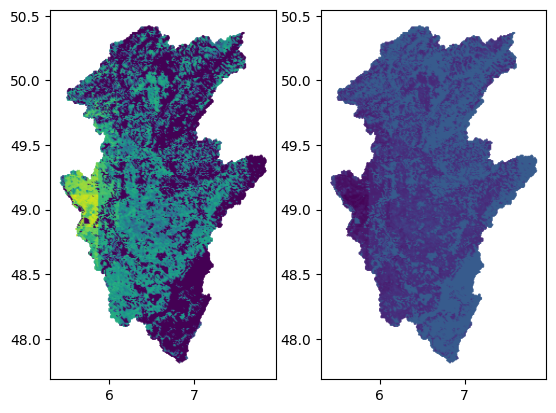

In [8]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.scatter(x=x_coords, y=y_coords, s=0.20, c=transpiration)
ax2.scatter(x=x_coords, y=y_coords, s=0.20, c=recharge, vmax=0.5)

The `set_value` method is implemented as well:

In [ ]:
model.set_value('lateral.river.reservoir.evaporation', np.array([0.25, 0.45]))
model.get_value('lateral.river.reservoir.evaporation')

In [ ]:
model.set_value_at_indices('lateral.river.reservoir.evaporation', np.array([1]), np.array([2.2]))
model.get_value('lateral.river.reservoir.evaporation')

In [ ]:
model.get_current_time()

In [ ]:
model.update()
model.get_current_time()

In [ ]:
model.get_output_var_names()

Lastly, with `update_until` and `finalize` we can finish the model and have it write to output

In [ ]:
model.update_until(model.get_end_time())
model.finalize()